<a href="https://colab.research.google.com/github/chavgova/My-AI/blob/master/emotion_recognition_18_female_cleanCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Voice Emotion Recognition**





In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import model_from_json
from matplotlib.pyplot import specgram
from matplotlib.axis import Axis
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from array import *
import re
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
dataset_path = '/content/drive/My Drive/My_AI/RawData'  # https://drive.google.com/drive/folders/19vC20XHt-_yhsobePchy7K3PcBHD1oCu?usp=sharing
model_path = '/content/drive/My Drive/My_AI/MY MODELS/'

model_name = 'Emotion_Voice_Detection_CNN_model_18_FEMALE_8features_normalized_tanh_regularized'

# LABLES & FEATURES

In [ ]:
dataset_files_list = [] 
dataset_files_list = os.listdir(dataset_path)

print(len(dataset_files_list))

In [ ]:
emo_labels_list=[] # EMO LABELS 
dataset = ''
count = 0
for item in dataset_files_list:
    file_label = item[6:-16]
    try:
      file_label = int(file_label)
      dataset = 'RAVDESS'
    except:
      if (item[:1] == 'Y') or (item[:1] == 'O'):
        file_label = re.split('_|\.', item)[2]
        dataset = 'TESS'
      else: 
        try:
          item = item[:-4]
          int(item[-3:])  
          dataset = 'SER_v4'
        except:
          dataset = 'SAVEE'

    if dataset == 'RAVDESS':
      if int(item[18:-4])%2==0:  #female
          if file_label == 1:
            emo_labels_list.append('female_neutral')
          elif file_label == 2:
            emo_labels_list.append('female_calm')
          elif file_label == 3:
            emo_labels_list.append('female_joy')
          elif file_label == 4:
            emo_labels_list.append('female_sadness')
          elif file_label == 5:
            emo_labels_list.append('female_anger')
          elif file_label == 6:
            emo_labels_list.append('female_fear')
          elif file_label == 7:
            emo_labels_list.append('female_disgust')
          elif file_label == 8:
            emo_labels_list.append('female_surprise')
      else:
          if file_label== 1:
            emo_labels_list.append('male_neutral')
          elif file_label == 2:
            emo_labels_list.append('male_calm')
          elif file_label == 3:
            emo_labels_list.append('male_joy')
          elif file_label == 4:
            emo_labels_list.append('male_sadness')
          elif file_label == 5:
            emo_labels_list.append('male_anger')
          elif file_label == 6:
            emo_labels_list.append('male_fear')
          elif file_label == 7:
            emo_labels_list.append('male_disgust')
          elif file_label == 8:
            emo_labels_list.append('male_surprise')

    elif dataset == 'TESS':
      if file_label == 'neutral': emo_labels_list.append('female_neutral')
      elif file_label == 'angry': emo_labels_list.append('female_anger')
      elif file_label == 'disgust': emo_labels_list.append('female_disgust')
      elif file_label == 'ps': emo_labels_list.append('female_surprise')
      elif file_label == 'happy': emo_labels_list.append('female_joy')
      elif file_label == 'sad': emo_labels_list.append('female_sadness')
      elif file_label == 'fear': emo_labels_list.append('female_fear')

    elif dataset == 'SER_v4':
      if int(item[-3:])%2 == 1: 
        file_label = item[:-3]
        if file_label == 'neutral': emo_labels_list.append('male_neutral')
        elif file_label == 'anger': emo_labels_list.append('male_anger')
        elif file_label == 'disgust': emo_labels_list.append('male_disgust')
        elif file_label == 'surprise': emo_labels_list.append('male_surprise')
        elif file_label == 'happy': emo_labels_list.append('male_joy')
        elif file_label == 'sad': emo_labels_list.append('male_sadness')
        elif file_label == 'fear': emo_labels_list.append('male_fear')
      else:
        file_label = item[:-3]
        if file_label == 'neutral': emo_labels_list.append('female_neutral')
        elif file_label == 'anger': emo_labels_list.append('female_anger')
        elif file_label == 'disgust': emo_labels_list.append('female_disgust')
        elif file_label == 'surprise': emo_labels_list.append('female_surprise')
        elif file_label == 'happy': emo_labels_list.append('female_joy')
        elif file_label == 'sad': emo_labels_list.append('female_sadness')
        elif file_label == 'fear': emo_labels_list.append('female_fear')
      
    elif dataset == 'SAVEE':
      if item[:1]=='a':
        emo_labels_list.append('male_anger')
      elif item[:1]=='f':
        emo_labels_list.append('male_fear')
      elif item[:1]=='h':
        emo_labels_list.append('male_joy')
      elif item[:1]=='n':
        emo_labels_list.append('male_neutral')
      elif item[:2]=='sa':
        emo_labels_list.append('male_sadness')
      elif item[:2]=='su':
        emo_labels_list.append('male_surprise')
      elif item[:1]=='d':
        emo_labels_list.append('male_disgust')


In [ ]:
labels = pd.DataFrame(emo_labels_list)
labels   

,0
0,male_sadness
1,male_sadness
2,male_sadness
3,female_sadness
4,male_sadness
...,...
7193,male_fear
7194,male_anger
7195,female_calm
7196,female_sadness


Getting the features of audio files using librosa

In [ ]:
def reshape_feature(arr):   # reshapes to 10 values per feature
  shape_arr = arr.shape[0]
  r = shape_arr%10
  arr = arr[:(len(arr)-r)]
  d = int(shape_arr/10)
  arr = np.mean(arr.reshape(-1, d), axis=1) 
  return arr


def extract_feature(current_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    rolloff = kwargs.get("rolloff")
    centroids = kwargs.get("centroids")
    rms = kwargs.get("rms")

    X, sample_rate = librosa.core.load(current_file)

    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)# (n=40,t) -> 40 values 
        result = np.hstack((result, mfccs))  
    if rms:    
        rms = np.mean(librosa.feature.rms(X),axis=0)
        rms = reshape_feature(rms)      # (1,t) - > 10 values (avg)
        result = np.hstack((result, rms))        
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0) # (128,t) -> 128 values   
        result = np.hstack((result, mel)) 
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0) # (6,t) -> 6 values     
        result = np.hstack((result, tonnetz))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, n_chroma = 14, sr=sample_rate).T,axis=0)  # (n=14,t) -> 14 values        
        result = np.hstack((result, chroma))              
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0) # (7,t) -> 7 values
        result = np.hstack((result, contrast)) 
    if rolloff:    
        rolloff = np.mean(librosa.feature.spectral_rolloff(X+0.01, sr=sample_rate),axis=0)
        rolloff = reshape_feature(rolloff)    # (1,t) - > 10 values (avg)
        result = np.hstack((result, rolloff)) 
    if centroids:    
        centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate),axis=0)
        centroids = reshape_feature(centroids)  # (1,t) - > 10 values (avg)
        result = np.hstack((result, centroids)) 
    
    return result

f = os.fspath(dataset_path +'/03-01-04-01-02-02-01.wav')
a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
print(a, a.shape)

[-7.11961060e+02  5.99244232e+01  3.83192271e-01  1.59403591e+01
  5.67376900e+00  1.53520793e-01  8.92264783e-01 -7.20391083e+00
 -1.25652571e+01 -3.65540648e+00 -2.70926380e+00 -2.14541817e+00
 -3.53641719e-01 -3.74469924e+00 -2.85052490e+00  2.17255926e+00
 -3.43898535e+00 -3.96823716e+00 -1.86625969e+00  1.59572497e-01
 -6.75410128e+00 -1.73930418e+00 -2.20268345e+00 -3.39606977e+00
 -2.21927452e+00 -4.38045233e-01 -4.57583570e+00 -2.13146973e+00
 -2.53880334e+00  1.23917490e-01 -1.93521500e+00 -1.47470093e+00
 -2.17954540e+00 -2.38947201e+00 -4.25227070e+00 -1.58187962e+00
 -2.25012422e+00 -1.58634901e+00 -2.81825447e+00 -2.49687386e+00
  4.40952726e-06  1.31456466e-06  2.27152050e-05  7.13768462e-03
  5.94100310e-03  6.31744554e-03  3.85051640e-03  6.29960035e-04
  8.80118478e-06  1.85505723e-06  2.49405844e-06  5.83407891e-05
  3.31626995e-03  2.22720150e-02  2.82310750e-02  8.91589466e-03
  4.50106710e-03  2.20895037e-02  2.94586308e-02  2.15100236e-02
  9.77406744e-03  1.24280

EXTRACT FEATURES FROM THE FILES IN THE DATASETS

In [ ]:
data_frame = pd.DataFrame(columns=['all_features'])
bookmark=0

for index,y in enumerate(dataset_files_list):
      all_features_ndarray = extract_feature(dataset_path + y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True, rolloff=True, centroids=True, rms=True)
      data_frame.loc[bookmark] = [all_features_ndarray]
      bookmark=bookmark+1
      if bookmark%1000==0: print(bookmark)

print(pd.DataFrame(data_frame['all_features']).shape)
        

In [ ]:
data_frame = pd.DataFrame(data_frame['all_features'].values.tolist())
data_frame_labels = pd.concat([data_frame,labels], axis=1)
data_frame_labels = data_frame_labels.rename(index=str, columns={"0": "label"})
data_frame_labels  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224
0,-677.012607,68.128887,1.226144,13.246095,1.681556,0.729557,-13.641576,-3.576321,-8.595147,-4.046197,4.691763,-6.023820,1.683967,-0.069172,-5.879847,0.592705,-6.601959,-6.193829,0.361195,-2.431681,-6.519171,-0.058899,-5.800941,-3.980719,-2.219832,-0.920634,-2.284002,-1.727077,-1.160240,-1.174291,-2.115416,0.928084,1.233274,5.737881,-0.308995,2.263868,0.248554,6.760577,9.820166,17.682036,...,0.563259,0.491308,0.583315,0.633197,0.679227,0.749516,0.582634,0.494202,0.531570,0.512122,0.458497,0.463920,0.566851,23.916075,17.319184,20.345724,18.528481,18.319662,17.714452,30.448045,10.766602,10.766602,2483.118318,3031.648335,2326.719264,1352.058491,1034.160413,592.163086,10.766602,10.766602,4141.946889,3960.300525,3169.100261,2211.468405,1750.150643,1249.341416,1107.307061,874.524551,3054.225012,3151.287050
1,-557.077631,37.731340,-25.690923,2.721265,-8.469222,-16.783412,-11.141711,-16.858932,-20.300446,1.526086,-9.046842,-4.551558,-5.803873,-6.084743,0.324458,-1.555424,-1.621261,13.536664,13.608310,16.614511,16.819150,12.947100,1.430434,4.995464,-5.904416,3.786624,2.862549,2.213109,-3.014830,-2.941496,0.153834,5.607506,1.279606,-2.695713,-3.278017,1.666410,3.034963,-0.849230,3.336941,10.858757,...,0.491847,0.444110,0.454247,0.493769,0.492756,0.661281,0.718564,0.530350,0.553521,0.602293,0.517585,0.451096,0.424385,19.880041,22.838296,21.529882,20.549496,20.496978,20.783570,32.063672,10.766602,99.462891,4120.532227,4847.534180,3142.309570,2521.435547,3741.650391,1993.359375,87.158203,10.766602,4724.091019,3319.011026,2992.454686,3003.583954,1871.331079,1582.119839,2224.851651,1357.369560,3383.279798,4125.006267
2,-651.306815,28.174297,-22.387151,-3.099898,-21.895704,-20.684444,-6.937055,-22.691892,-16.077010,-2.648343,-13.845468,-4.334402,-9.532113,-4.433517,-8.319336,-6.686531,5.342289,12.560371,14.379339,23.704241,15.249805,10.304655,-0.133664,1.355806,-6.263078,1.910011,-2.980607,-1.288093,-8.861574,-4.063428,-4.258260,2.463083,-3.307999,-5.789722,-2.006577,1.961835,-0.318634,0.151110,3.371160,9.975064,...,0.329323,0.309499,0.281291,0.325560,0.367705,0.500406,0.605766,0.484343,0.392134,0.408733,0.364195,0.290005,0.278199,16.241609,27.394842,23.728332,21.416993,20.492162,20.763445,30.739935,10.766602,746.810636,4213.656339,3384.628018,2375.014426,4060.476962,1512.218129,1479.428933,108.644798,10.766602,1005.430834,1924.243185,2937.317570,2505.250228,1780.086072,2723.276573,1538.029538,1392.617717,3731.779374,4747.144549
3,-598.479799,83.876933,-4.367654,17.879762,1.207946,-22.144229,-9.396517,-0.343920,-17.230260,2.128921,-0.053539,-7.968760,-5.630409,0.340969,-4.279300,-0.842008,-4.132873,-3.515869,-1.105263,-3.192063,-7.741529,-2.782670,-8.780764,-1.375007,-4.971819,1.227432,-5.522446,-0.596580,-2.901904,-2.884426,-0.602703,-0.587759,0.122286,2.224288,3.667640,1.273863,-0.666005,2.981427,6.911973,14.680708,...,0.532198,0.434175,0.455267,0.475820,0.525077,0.628532,0.578828,0.479653,0.514261,0.543563,0.464444,0.399926,0.475848,25.398912,18.158348,19.869336,20.598790,18.313720,20.464000,30.941011,10.766602,657.698922,3549.233611,2963.155995,2875.150730,1704.867952,2240.389351,805.622665,501.817255,10.766602,3090.152980,2984.077314,2357.822539,1973.434529,1943.695531,1239.052240,1601.832606,852.554178,1158.985943,2473.661473
4,-620.545440,63.076147,-4.554053,12.682791,0.132151,1.816087,-10.988464,-12.289517,-18.790218,-3.880212,-2.682088,-8.190950,-5.754832,-9.954274,-0.609016,2.046038,-12.034189,-4.354440,-3.916669,-7.596240,-10.865715,-2.858283,-8.838741,-8.424173,-3.157844,-6.277223,-5.993330,-3.999957,-6.670746,-3.156587,-4.428938,-0.825791,0.930508,-1.368441,-1.244825,0.040529,0.498666,3.362422,8.152221,14.178395,...,0.534658,0.466229,0.507336,0.567961,0.628232

# SAVE DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + model_name + '_dataFrame.pkl'), 'wb') as f:
  pickle.dump(data_frame_labels, f)

# LOAD DATASET FEATURES AND LABELS 

In [ ]:
with open((model_path + model_name + '_dataFrame.pkl'), 'rb') as f:
  data_frame_labels = pickle.load(f)

data_frame_labels

In [ ]:
data_array = data_frame_labels.iloc[:,:(data_frame_labels.shape[1]-1)].to_numpy()
print(data_array)

[[-6.77012607e+02  6.81288872e+01  1.22614371e+00 ...  8.74524551e+02
   3.05422501e+03  3.15128705e+03]
 [-5.57077631e+02  3.77313397e+01 -2.56909235e+01 ...  1.35736956e+03
   3.38327980e+03  4.12500627e+03]
 [-6.51306815e+02  2.81742966e+01 -2.23871507e+01 ...  1.39261772e+03
   3.73177937e+03  4.74714455e+03]
 ...
 [-7.27802977e+02  4.74886694e+01 -3.98731302e+00 ...  2.38049026e+03
   2.63404561e+03  2.85345574e+03]
 [-7.14319052e+02  4.98782376e+01 -4.65872935e+00 ...  2.23603802e+03
   3.70609337e+03  4.22994355e+03]
 [-6.14432442e+02  6.15239027e+01 -4.08322423e+01 ...  1.84150037e+03
   3.10176721e+03  3.25515239e+03]]


# **PREPROCESSING - SCALING**




In [ ]:
scaler = MinMaxScaler()
data_array = scaler.fit_transform(data_array)
data_array

In [ ]:
scaler.n_samples_seen_

7198

In [ ]:
'''
scaler = MinMaxScaler()
scaler.min_ = array('d',[ 1.30154070e+00,  2.97715849e-02,  5.41415007e-01,  3.64280680e-01,        5.84953937e-01,  6.50669604e-01,  7.27531168e-01,  7.54978988e-01,        7.55184765e-01,  4.88008099e-01,  6.53292330e-01,  4.84929694e-01,        5.48758173e-01,  3.57267987e-01,  5.15166394e-01,  5.19290142e-01,        5.70538579e-01,  3.53063620e-01,  4.84194260e-01,  3.27457909e-01,        3.24381379e-01,  1.84661186e-01,  2.68046396e-01,  2.58805806e-01,        2.89444124e-01,  1.86745819e-01,  2.83281155e-01,  1.70330988e-01,        3.32254964e-01,  3.27732848e-01,  4.58707382e-01,  2.67222570e-01,        3.33327481e-01,  2.20059486e-01,  1.84829931e-01,  1.31825284e-01,        1.89310349e-01,  1.45575957e-01,  2.30085276e-01,  1.46747188e-01,        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.99015658e-04,       -7.13259542e-05, -4.71385459e-05, -4.16212144e-04, -9.93093845e-05,       -5.81941623e-06,  0.00000000e+00, -3.73939930e-09, -3.20601331e-09,       -1.83520580e-09, -1.86189596e-09, -9.11656485e-10, -1.27284442e-09,       -8.09480752e-10, -1.01175668e-09, -5.27261649e-09, -6.84602210e-08,       -1.08224763e-07, -7.29590747e-08, -5.07011447e-08, -6.89153954e-08,       -3.01679720e-07, -1.69732639e-07, -1.01042934e-07, -5.13562357e-08,       -1.20337624e-08, -9.23787980e-09, -1.72962363e-08, -4.11257864e-08,       -5.43108529e-08, -3.82925048e-08, -3.21115953e-08, -2.93470125e-08,       -3.22921611e-08, -7.28703668e-08, -8.43160813e-08, -5.33754934e-08,       -3.48581916e-08, -3.02516076e-08, -3.31239966e-08, -1.44645930e-08,      -2.41520860e-08, -3.56238387e-08, -2.76142199e-08, -3.06727509e-08,       -3.44345189e-08, -3.43187931e-08, -1.01301426e-08, -8.80770140e-09,       -2.49743116e-08, -9.22353098e-08, -7.74890261e-08, -1.09284695e-07,       -4.87964742e-08, -2.36972767e-08, -6.49535514e-08, -8.46584064e-08,       -1.14254250e-07, -9.76232645e-08, -1.84039716e-07, -1.26451834e-07,       -2.34784315e-07, -3.18204391e-07, -1.23961745e-07, -5.94465285e-08,       -1.82377738e-07, -1.32080732e-07, -2.07906121e-07, -1.80756105e-07,       -4.33149701e-07, -2.69355898e-07, -2.52788617e-07, -1.92414574e-07,       -1.55175231e-07, -2.00444796e-07, -1.43011866e-07, -1.23685146e-07,       -9.21234069e-08, -3.75060442e-08, -2.94232908e-08, -1.02231839e-07,       -8.30043446e-08, -7.54564086e-08, -7.07511467e-08, -1.10602201e-07,       -9.30265645e-08, -7.58011852e-08, -8.27770407e-08, -1.15673950e-07,       -1.76792014e-07, -6.56155012e-08, -1.38688341e-07, -1.93922299e-07,       -2.61136975e-07, -2.83564652e-07, -2.45926574e-07, -6.01926362e-07,    -1.40350091e-07, -2.87268152e-07, -2.35565227e-07, -2.36514564e-07,       -4.46589549e-07, -1.17599844e-07, -1.39270641e-07, -2.80638901e-07,       -5.00816068e-07, -6.55967909e-07, -1.52268463e-06, -1.93650705e-06,       -8.10495124e-07, -8.34085153e-07, -7.96100307e-07, -4.29721896e-07,       -3.26402869e-07, -4.76817284e-07, -6.44593047e-07, -4.72604145e-07,       -2.85124273e-07, -1.83989751e-07, -1.49900636e-07, -2.55917055e-07,       -3.14224497e-07, -2.04816020e-07, -1.58638069e-07, -1.28591689e-07,       -1.24634399e-07, -7.53818049e-08, -5.44385256e-08, -4.15725204e-08,      -6.20036927e-08, -1.10522477e-07, -9.13172066e-08, -8.93674133e-08,       -6.64198305e-08, -1.50288986e-07,  5.11835480e-01,  2.98677029e-01,        4.69133950e-01,  5.07910873e-01,  4.13857479e-01,  4.43363388e-01,       -2.43311642e-01, -2.77122596e-01, -2.80790126e-01, -2.30427055e-01,       -2.08248104e-01, -2.10005500e-01, -2.19419018e-01, -1.83630685e-01,       -1.65850129e-01, -1.81438555e-01, -2.41213947e-01, -2.63856160e-01,       -3.33203326e-01, -3.22948605e-01, -4.99982519e-01, -5.12719137e-01,       -7.13829874e-01, -8.94023745e-01, -1.00051554e+00, -1.21701158e+00,      -1.14511248e+00, -1.06028476e-03, -1.08813928e-03, -1.30314383e-03,       -1.45257134e-02, -2.95757454e-03, -1.08830846e-03, -1.09890110e-03,       -1.09340831e-03, -1.08409478e-03, -1.06791969e-03,  0.00000000e+00,        0.00000000e+00,  0.00000000e+00, -6.44111630e-02, -1.71689653e-02,       -3.58174374e-02, -3.44976589e-02, -1.71945332e-02, -8.57374462e-03,        0.00000000e+00])
scaler.data_range_ = array('d',[6.52241714e+02, 1.68176227e+02, 1.04053689e+02, 9.91685069e+01,       7.46654968e+01, 5.89145889e+01, 4.82919183e+01, 4.17690403e+01,       4.34677058e+01, 4.79942337e+01, 3.88439704e+01, 3.90666637e+01,       4.05845438e+01, 3.32298918e+01, 3.28078550e+01, 2.76777036e+01,       2.86886108e+01, 3.53498761e+01, 4.21253336e+01, 4.81495815e+01,      4.00648790e+01, 4.97408242e+01, 4.42379690e+01, 5.32160192e+01,       5.06672318e+01, 4.40168920e+01, 4.04346301e+01, 3.98116873e+01,       4.14117863e+01, 3.43869411e+01, 3.32598163e+01, 2.69759558e+01,       3.96590978e+01, 4.82208183e+01, 4.95459027e+01, 4.84250894e+01,       5.34608764e+01, 5.07120762e+01, 4.87717607e+01, 3.97573287e+01,       1.52572557e-01, 5.95153689e-01, 6.81138098e-01, 6.48314431e-01,       5.41799167e-01, 6.23951944e-01, 5.27459789e-01, 4.96021721e-01,       5.00585385e-01, 2.80241996e-01, 4.91876645e+01, 6.15354190e+01,       4.03047071e+01, 2.60023588e+01, 1.02844572e+02, 1.63793195e+02,       1.70065325e+02, 1.92597128e+02, 2.24085839e+02, 2.69475772e+02,       3.33291035e+02, 1.80516423e+02, 4.28663536e+02, 5.27228310e+02,       4.63625961e+02, 7.90261887e+02, 8.89430270e+02, 1.12309630e+03,       7.82205499e+02, 6.91495361e+02, 4.66890931e+02, 3.74591320e+02,       3.95049130e+02, 4.72728471e+02, 3.32955066e+02, 4.19130227e+02,       2.93577877e+02, 1.50630791e+02, 1.39809332e+02, 1.64636118e+02,       9.64905195e+01, 7.95872410e+01, 5.83180516e+01, 1.03945840e+02,       4.73320940e+01, 3.04968803e+01, 5.93987467e+01, 4.64984402e+01,       4.36957165e+01, 4.96062071e+01, 8.77722747e+01, 7.70511810e+01,       4.14122544e+01, 3.08291732e+01, 6.08449274e+01, 2.01880310e+01,       1.87199570e+01, 2.05941656e+01, 1.55202411e+01, 2.22962572e+01,       3.57374191e+01, 1.99214858e+01, 1.81767517e+01, 2.39118579e+01,       8.76485744e+00, 6.88697759e+00, 1.97554742e+01, 3.69496037e+01,       1.15390726e+01, 7.66053593e+00, 1.05157281e+01, 1.40124607e+01,       8.43961749e+00, 7.76351909e+00, 1.05238587e+01, 8.45528025e+00,       7.57228541e+00, 6.16527602e+00, 5.71192053e+00, 4.24999604e+00,       6.27073078e+00, 7.61358274e+00, 6.16633023e+00, 4.77110642e+00,       5.24676247e+00, 4.40375569e+00, 4.93185207e+00, 3.83174051e+00,       3.09398867e+00, 5.27870434e+00, 5.42089651e+00, 4.56979798e+00,      4.56245055e+00, 7.80779558e+00, 1.96376517e+00, 1.90968377e+00,       1.79923949e+00, 1.27912124e+00, 1.32796941e+00, 1.41690693e+00,       2.10152473e+00, 2.27567075e+00, 2.49671663e+00, 2.69114916e+00,      1.73877702e+00, 1.54745254e+00, 2.14144604e+00, 1.53383522e+00,       1.08421727e+00, 7.56801499e-01, 3.64141739e-01, 2.97685975e-01,       4.17075884e-01, 4.83592052e-01, 5.46413252e-01, 3.10337275e-01,       3.80970484e-01, 2.25499727e-01, 1.60391627e-01, 1.56237879e-01,      1.90543353e-01, 2.53929373e-01, 2.84855190e-01, 1.46602727e-01,       1.13809781e-01, 1.03825763e-01, 1.06031696e-01, 9.74275767e-02,      8.92947276e-02, 1.39934682e-01, 1.47621415e-01, 1.71231672e-01,       1.09979188e-01, 6.21654654e-02, 7.42385447e-02, 6.08512963e-02,      3.10103957e-02, 3.48755490e-03, 8.64320615e-02, 1.31445625e-01,       4.64571646e-01, 4.88656089e-01, 1.00872555e-01, 1.05418486e-01,       6.63817784e-01, 6.42916587e-01, 6.64371343e-01, 6.80407515e-01,       7.03646321e-01, 6.94453016e-01, 6.73189254e-01, 7.58290981e-01,      7.89249668e-01, 7.82008484e-01, 6.85849487e-01, 6.47753881e-01,       6.06800442e-01, 6.12528130e-01, 2.25197958e+01, 1.97612471e+01,       1.75837630e+01, 1.45561777e+01, 1.40308770e+01, 1.21278373e+01,       2.13206463e+01, 1.01544434e+04, 9.89450684e+03, 8.26202087e+03,      8.15330811e+03, 9.50535400e+03, 9.89296875e+03, 9.79760742e+03,       9.84682617e+03, 9.93142090e+03, 1.00818457e+04, 8.40475004e+03,       8.07799667e+03, 6.28119379e+03, 5.56974926e+03, 7.36956027e+03,       7.40116682e+03, 7.81074859e+03, 7.72092824e+03, 7.93831423e+03,     8.39173734e+03])
scaler.n_samples_seen_ = 7198
scaler.data_min_ = array('d',[-8.48919139e+02, -5.00687281e+00, -5.63362288e+01, -3.61251711e+01, -4.36758763e+01, -3.83339322e+01, -3.51338757e+01, -3.15347478e+01, -3.28261492e+01, -2.34215747e+01, -2.53764680e+01, -1.89445853e+01,-2.22711001e+01, -1.18719766e+01, -1.69015044e+01, -1.43727587e+01,-1.63679592e+01, -1.24807552e+01, -2.03968447e+01, -1.57669613e+01,-1.29963007e+01, -9.18519960e+00, -1.18578282e+01, -1.37726148e+01, -1.46653325e+01, -8.21997057e+00, -1.14543687e+01, -6.78116402e+00,-1.37592716e+01, -1.12697302e+01, -1.52565233e+01, -7.20858423e+00,   -1.32194672e+01, -1.06114485e+01, -9.15756579e+00, -6.38365115e+00, -1.01206972e+01, -7.38245902e+00, -1.12216641e+01, -5.83427619e+00,0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.23519052e-04, 3.86443426e-05,  2.94121874e-05,  2.19535170e-04,  4.92596118e-05,  2.91311471e-06,  0.00000000e+00,  1.83932318e-07,  1.97283372e-07,7.39674322e-08,  4.84136869e-08,  9.37589207e-08,  2.08483254e-07, 1.37664607e-07,  1.94861431e-07,  1.18151869e-06,  1.84483709e-05,3.60703433e-05,  1.31703112e-05,  2.17337320e-05,  3.63341474e-05,1.39866550e-04,  1.34133236e-04,  8.98706439e-05,  5.76779980e-05,9.41287515e-06,  6.38795103e-06,  8.07545588e-06,  1.54053626e-05, 2.14554552e-05,  1.81019572e-05,  1.06917183e-05,  1.23002200e-05,9.48026410e-06,  1.09765210e-05,  1.17881750e-05,  8.78753401e-06, 3.36348502e-06,  2.40764199e-06,  1.93172694e-06,  1.50353428e-06,1.14316880e-06,  1.08641595e-06,  1.64025005e-06,  1.42623507e-06, 1.50464098e-06,  1.70242516e-06,  8.89145661e-07,  6.78643795e-07,1.03424254e-06,  2.84353834e-06,  4.71481417e-06,  2.20624280e-06,  9.13467900e-07,  4.88025640e-07,  1.00809478e-06,  1.88756560e-06, 4.08315202e-06,  1.94480048e-06,  3.34524422e-06,  3.02369828e-06, 2.05785105e-06,  2.19146651e-06,  2.44892305e-06,  2.19652567e-06, 2.10446995e-06,  1.01180920e-06,  2.18628424e-06,  2.53283781e-06, 3.65561779e-06,  2.09114966e-06,  2.66031169e-06,  1.62691915e-06, 1.17503114e-06,  1.23579750e-06,  8.16872411e-07,  5.25661382e-07,5.77681083e-07,  2.85555371e-07,  1.81433728e-07,  4.87758981e-07, 4.35504080e-07,  3.32291589e-07,  3.48934189e-07,  4.23798935e-07,        2.87823137e-07,  4.00132045e-07,  4.48725771e-07,  5.28606582e-07, 8.06604822e-07,  5.12312420e-07,  2.72351334e-07,  3.70330268e-07,4.69847958e-07,  3.62713569e-07,  3.26582967e-07,  8.52873632e-07, 2.94949187e-07,  6.53727731e-07,  5.88139621e-07,  6.36495971e-07,  7.76519644e-07,  1.81980177e-07,  2.98240564e-07,  4.30453832e-07,5.42993432e-07,  4.96437497e-07,  5.54473029e-07,  5.76470988e-07, 3.38037971e-07,  4.03356951e-07,  4.34999757e-07,  1.33358722e-07,1.24349859e-07,  1.07522168e-07,  1.03387328e-07,  7.38386693e-08, 5.43285349e-08,  4.67204021e-08,  4.26999742e-08,  3.75181380e-08,3.57618212e-08,  2.12651796e-08,  1.68206635e-08,  1.25283766e-08, 1.11291947e-08,  1.05485289e-08,  8.03629219e-09,  7.11853220e-09, 6.81911580e-09,  6.87068121e-09,  6.77925652e-09,  5.43812294e-09, 2.05970522e-09,  5.24141090e-10, -4.42389956e-02, -3.92597887e-02, -2.17946331e-01, -2.48193741e-01, -4.17468614e-02, -4.67386971e-02, 1.61514595e-01,  1.78166714e-01,  1.86548913e-01,  1.56784300e-01, 1.46533012e-01,  1.45838953e-01,  1.47710525e-01,  1.39245492e-01,1.30897160e-01,  1.41886489e-01,  1.65436462e-01,  1.70913852e-01,2.02187925e-01,  1.97815105e-01,  1.12595042e+01,  1.01319695e+01, 1.25518153e+01,  1.30135685e+01,  1.40381104e+01,  1.47597184e+01, 2.44145381e+01,  1.07666016e+01,  1.07666016e+01,  1.07666016e+01,1.18432617e+02,  2.81127930e+01,  1.07666016e+01,  1.07666016e+01, 1.07666016e+01,  1.07666016e+01,  1.07666016e+01,  0.00000000e+00,0.00000000e+00,  0.00000000e+00,  3.58754028e+02,  1.26527725e+02,2.65090829e+02,  2.69452541e+02,  1.32757757e+02,  6.80610788e+01,  0.00000000e+00])
scaler.data_max_ = array('d',[-1.96677425e+02,  1.63169354e+02,  4.77174604e+01,  6.30433357e+01,   3.09896204e+01,  2.05806567e+01,  1.31580426e+01,  1.02342925e+01,   1.06415566e+01,  2.45726590e+01,  1.34675025e+01,  2.01220784e+01,     1.83134437e+01,  2.13579153e+01,  1.59063507e+01,  1.33049450e+01,  1.23206515e+01,  2.28691209e+01,  2.17284889e+01,  3.23826202e+01, 2.70685783e+01,  4.05556246e+01,  3.23801409e+01,  3.94434044e+01,  3.60018993e+01,  3.57969214e+01,  2.89802614e+01,  3.30305233e+01,  2.76525147e+01,  2.31172110e+01,  1.80032931e+01,  1.97673716e+01,    2.64396307e+01,  3.76093698e+01,  4.03883369e+01,  4.20414382e+01,  4.33401792e+01,  4.33296171e+01,  3.75500967e+01,  3.39230525e+01,    1.52572557e-01,  5.95153689e-01,  6.81138098e-01,  6.48637950e-01,  5.41837811e-01,  6.23981357e-01,  5.27679324e-01,  4.96070981e-01,     5.00588298e-01,  2.80241996e-01,  4.91876646e+01,  6.15354192e+01,   4.03047072e+01,  2.60023589e+01,  1.02844572e+02,  1.63793195e+02,     1.70065325e+02,  1.92597128e+02,  2.24085840e+02,  2.69475791e+02, 3.33291071e+02,  1.80516437e+02,  4.28663558e+02,  5.27228346e+02,   4.63626100e+02,  7.90262021e+02,  8.89430360e+02,  1.12309635e+03,   7.82205509e+02,  6.91495368e+02,  4.66890939e+02,  3.74591335e+02,      3.95049152e+02,  4.72728489e+02,  3.32955076e+02,  4.19130240e+02,  2.93577886e+02,  1.50630802e+02,  1.39809344e+02,  1.64636127e+02,    9.64905228e+01,  7.95872434e+01,  5.83180535e+01,  1.03945842e+02,  4.73320952e+01,  3.04968814e+01,  5.93987483e+01,  4.64984416e+01,    4.36957180e+01,  4.96062088e+01,  8.77722755e+01,  7.70511817e+01,  4.14122555e+01,  3.08291760e+01,  6.08449321e+01,  2.01880332e+01,    1.87199579e+01,  2.05941661e+01,  1.55202421e+01,  2.22962590e+01,  3.57374232e+01,  1.99214878e+01,  1.81767551e+01,  2.39118609e+01,  8.76485950e+00,  6.88697978e+00,  1.97554766e+01,  3.69496059e+01,  1.15390747e+01,  7.66053695e+00,  1.05157303e+01,  1.40124632e+01,   8.43962114e+00,  7.76352118e+00,  1.05238614e+01,  8.45528188e+00,7.57228658e+00,  6.16527725e+00,  5.71192134e+00,  4.24999656e+00,    6.27073136e+00,  7.61358303e+00,  6.16633041e+00,  4.77110690e+00, 5.24676290e+00,  4.40375603e+00,  4.93185242e+00,  3.83174094e+00,   3.09398896e+00,  5.27870474e+00,  5.42089696e+00,  4.56979851e+00,   4.56245136e+00,  7.80779609e+00,  1.96376544e+00,  1.90968414e+00,  1.79923996e+00,  1.27912160e+00,  1.32796973e+00,  1.41690778e+00, 2.10152502e+00,  2.27567141e+00,  2.49671722e+00,  2.69114980e+00,    1.73877780e+00,  1.54745272e+00,  2.14144634e+00,  1.53383565e+00,  1.08421782e+00,  7.56801995e-01,  3.64142293e-01,  2.97686552e-01,    4.17076222e-01,  4.83592455e-01,  5.46413687e-01,  3.10337408e-01,  3.80970608e-01,  2.25499835e-01,  1.60391731e-01,  1.56237953e-01, 1.90543407e-01,  2.53929420e-01,  2.84855233e-01,  1.46602764e-01, 1.13809817e-01,  1.03825784e-01,  1.06031712e-01,  9.74275892e-02,    8.92947387e-02,  1.39934692e-01,  1.47621423e-01,  1.71231680e-01,  1.09979195e-01,  6.21654723e-02,  7.42385515e-02,  6.08513017e-02,    3.10103977e-02,  3.48755542e-03,  4.21930658e-02,  9.21858359e-02,   2.46625315e-01,  2.40462348e-01,  5.91256937e-02,  5.86797888e-02,    8.25332379e-01,  8.21083300e-01,  8.50920256e-01,  8.37191816e-01,   8.50179333e-01,  8.40291969e-01,  8.20899779e-01,  8.97536473e-01,  9.20146828e-01,  9.23894973e-01,  8.51285948e-01,  8.18667733e-01,  8.08988367e-01,  8.10343235e-01,  3.37793000e+01,  2.98932166e+01,    3.01355783e+01,  2.75697463e+01,  2.80689875e+01,  2.68875557e+01,   4.57351844e+01,  1.01652100e+04,  9.90527344e+03,  8.27278748e+03,8.27174072e+03,  9.53346680e+03,  9.90373535e+03,  9.80837402e+03, 9.85759277e+03,  9.94218750e+03,  1.00926123e+04,  8.40475004e+03,   8.07799667e+03,  6.28119379e+03,  5.92850329e+03,  7.49608799e+03, 7.66625765e+03,  8.08020113e+03,  7.85368600e+03,  8.00637530e+03,8.39173734e+03])
scaler.scale_ = array('d',[1.53317394e-03, 5.94614363e-03, 9.61042331e-03, 1.00838465e-02,       1.33930670e-02, 1.69737245e-02, 2.07073986e-02, 2.39411773e-02,       2.30055850e-02, 2.08358364e-02, 2.57440212e-02, 2.55972716e-02,   2.46399222e-02, 3.00933872e-02, 3.04805053e-02, 3.61301650e-02,       3.48570381e-02, 2.82886423e-02, 2.37386844e-02, 2.07686125e-02,      2.49595163e-02, 2.01042105e-02, 2.26050160e-02, 1.87913342e-02,       1.97366219e-02, 2.27185509e-02, 2.47312761e-02, 2.51182522e-02,       2.41477147e-02, 2.90808071e-02, 3.00663115e-02, 3.70700488e-02,       2.52148953e-02, 2.07379309e-02, 2.01833037e-02, 2.06504523e-02,      1.87052676e-02, 1.97191690e-02, 2.05036682e-02, 2.51525953e-02,       6.55425863e+00, 1.68023826e+00, 1.46813106e+00, 1.54246142e+00,       1.84570236e+00, 1.60268753e+00, 1.89587912e+00, 2.01604074e+00,       1.99766120e+00, 3.56834455e+00, 2.03303005e-02, 1.62508035e-02,      2.48109978e-02, 3.84580494e-02, 9.72341061e-03, 6.10525974e-03,       5.88009342e-03, 5.19218542e-03, 4.46257562e-03, 3.71090874e-03,       3.00038074e-03, 5.53966216e-03, 2.33283197e-03, 1.89671150e-03,       2.15691114e-03, 1.26540330e-03, 1.12431523e-03, 8.90395600e-04,      1.27843642e-03, 1.44614130e-03, 2.14182785e-03, 2.66957601e-03,       2.53133072e-03, 2.11537925e-03, 3.00340828e-03, 2.38589330e-03,       3.40625121e-03, 6.63874890e-03, 7.15259835e-03, 6.07400134e-03,       1.03637125e-02, 1.25648281e-02, 1.71473493e-02, 9.62039458e-03,      2.11273137e-02, 3.27902392e-02, 1.68353721e-02, 2.15060977e-02,       2.28855384e-02, 2.01587676e-02, 1.13931193e-02, 1.29783864e-02,       2.41474417e-02, 3.24368089e-02, 1.64352238e-02, 4.95343008e-02,       5.34189261e-02, 4.85574418e-02, 6.44319886e-02, 4.48505771e-02,      2.79818752e-02, 5.01970590e-02, 5.50153303e-02, 4.18202553e-02,       1.14091987e-01, 1.45201576e-01, 5.06188812e-02, 2.70638898e-02,       8.66620775e-02, 1.30539170e-01, 9.50956501e-02, 7.13650532e-02,       1.18488782e-01, 1.28807566e-01, 9.50221800e-02, 1.18269291e-01,      1.32060527e-01, 1.62198740e-01, 1.75072464e-01, 2.35294337e-01,       1.59471047e-01, 1.31344209e-01, 1.62171010e-01, 2.09594990e-01,       1.90593724e-01, 2.27078900e-01, 2.02763584e-01, 2.60978006e-01,       3.23207389e-01, 1.89440426e-01, 1.84471332e-01, 2.18828054e-01,      2.19180458e-01, 1.28077124e-01, 5.09225856e-01, 5.23646906e-01,       5.55790379e-01, 7.81786721e-01, 7.53029395e-01, 7.05762659e-01,       4.75844984e-01, 4.39430879e-01, 4.00526029e-01, 3.71588470e-01,       5.75116872e-01, 6.46223372e-01, 4.66974175e-01, 6.51960513e-01,      9.22324356e-01, 1.32135045e+00, 2.74618341e+00, 3.35924459e+00,       2.39764522e+00, 2.06785863e+00, 1.83011667e+00, 3.22230064e+00,       2.62487526e+00, 4.43459516e+00, 6.23473942e+00, 6.40049651e+00,       5.24814949e+00, 3.93810290e+00, 3.51055566e+00, 6.82115553e+00,      8.78659102e+00, 9.63152084e+00, 9.43114221e+00, 1.02640344e+01,       1.11988695e+01, 7.14619127e+00, 6.77408490e+00, 5.84004107e+00,       9.09262938e+00, 1.60861017e+01, 1.34700916e+01, 1.64335037e+01,       3.22472506e+01, 2.86733837e+02, 1.15697807e+01, 7.60770854e+00,      2.15252052e+00, 2.04642902e+00, 9.91349925e+00, 9.48600230e+00,       1.50643750e+00, 1.55541173e+00, 1.50518232e+00, 1.46970746e+00,      1.42116852e+00, 1.43998223e+00, 1.48546637e+00, 1.31875497e+00,       1.26702619e+00, 1.27875851e+00, 1.45804585e+00, 1.54379623e+00,      1.64798825e+00, 1.63257808e+00, 4.44053760e-02, 5.06040938e-02,       5.68706483e-02, 6.86993535e-02, 7.12713822e-02, 8.24549321e-02,       4.69028934e-02, 9.84790564e-05, 1.01066179e-04, 1.21035763e-04,       1.22649603e-04, 1.05203867e-04, 1.01081892e-04, 1.02065735e-04,     1.01555565e-04, 1.00690527e-04, 9.91881873e-05, 1.18980338e-04,       1.23793069e-04, 1.59205405e-04, 1.79541296e-04, 1.35693306e-04,       1.35113831e-04, 1.28028701e-04, 1.29518106e-04, 1.25971330e-04,       1.19164836e-04])

scaler.transform(data_array)
'''

REPLACING OLD VALUES WITH THE SCALED ONES

In [ ]:
for w in range(0,data_array.shape[0]):
  data_frame_labels.iloc[w,:data_array.shape[1]] = data_array[w]
  
print(data_frame_labels.shape)

(7198, 226)


In [ ]:
data_frame_labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,0
0,-1.611956,0.247915,0.039518,0.084754,0.251604,0.441362,-0.765329,0.613241,0.030788,-0.384460,1.849337,-0.827682,1.190005,-0.213669,-0.897839,0.355731,-1.211129,-1.571266,0.485896,-0.539929,-0.982207,-0.260358,-0.949480,-0.964114,-0.229866,-0.686457,-0.443622,-1.089343,-0.236604,-0.897302,-0.643767,-0.665485,0.025006,0.526101,-0.465302,-0.353023,-0.422400,0.339245,1.295892,2.643080,...,-0.510210,0.385679,0.789562,1.186394,1.603846,0.338132,-0.380372,-0.055858,-0.212919,-0.650013,-0.597878,0.210031,0.396492,-0.318550,0.019199,0.074029,-0.401169,-0.730842,-0.386341,-0.799905,-0.990166,-0.285183,-0.445498,-0.418872,-0.799881,-0.991204,-0.899623,-0.885331,-0.669468,0.112791,0.413309,0.448976,-0.046448,-0.254130,-0.488675,-0.713949,-1.002167,0.632322,0.299528,male_sadness
1,-0.620560,-0.820414,-1.518584,-0.642449,-0.684949,-1.743950,-0.406576,-1.292609,-1.810972,0.675166,-0.333488,-0.586100,-0.445526,-1.519185,0.373139,-0.191600,0.121732,2.367652,3.320426,2.708554,3.036650,2.279340,0.615941,0.454729,-0.805351,0.100245,0.605619,-0.214298,-0.678669,-1.301056,-0.075711,0.483788,0.036553,-1.152073,-0.970253,-0.445272,-0.017017,-0.815281,0.137940,1.298585,...,-0.929132,-0.690720,-0.278610,-0.233903,0.935041,1.472649,-0.086745,0.119814,0.510144,-0.173656,-0.701654,-0.983369,-0.356502,1.078404,0.376520,0.905777,0.562927,0.748553,0.045608,-0.799905,-0.961050,0.684461,0.708402,-0.005351,0.138329,0.727909,-0.119892,-0.844043,-0.669468,0.356606,-0.023744,0.289607,0.789462,-0.155737,0.038098,0.458566,-0.525434,0.922318,0.934734,male_sadness
2,-1.399469,-1.156299,-1.327345,-1.044657,-1.923732,-2.230730,0.196829,-2.129549,-1.146439,-0.118644,-1.095906,-0.550467,-1.259866,-1.160831,-1.397578,-1.498976,1.985215,2.172748,3.485406,3.917765,2.766409,1.763346,0.277351,-0.120583,-0.861369,-0.213385,-0.585641,-0.991852,-2.072317,-1.557385,-1.180180,-0.288487,-1.106799,-1.767740,-0.754015,-0.399657,-0.504918,-0.663514,0.144052,1.124458,...,-2.123913,-2.133145,-1.567276,-1.186377,-0.284364,0.531197,-0.460457,-1.171739,-1.041970,-1.410257,-2.005220,-2.207926,-1.035317,2.231720,1.039904,1.262795,0.560794,0.738853,-0.308303,-0.799905,-0.748549,0.739607,-0.221198,-0.394385,1.373126,-0.687663,-0.405882,-0.832430,-0.669468,-1.200847,-0.974310,0.239862,0.263576,-0.229824,1.844500,-0.262040,-0.490632,1.229451,1.340587,male_sadness
3,-0.962795,0.801384,-0.284281,0.404912,0.207907,-2.412886,-0.156126,1.077041,-1.327896,0.789801,1.095391,-1.146826,-0.407637,-0.124659,-0.569960,-0.009826,-0.550389,-1.036649,0.172113,-0.669619,-1.192697,-0.792232,-1.594540,-0.552236,-0.659691,-0.327461,-1.103853,-0.838280,-0.651752,-1.288017,-0.265093,-1.037778,-0.251882,-0.173058,0.211019,-0.505882,-0.555455,-0.234111,0.776467,2.051683,...,-1.017316,-0.682210,-0.416115,0.012277,0.686810,0.306369,-0.498556,-0.194374,0.039204,-0.602073,-1.115728,-0.552279,0.673142,-0.106148,-0.124552,0.926064,-0.403800,0.594512,-0.254543,-0.799905,-0.777801,0.346149,-0.489021,-0.140806,-0.516816,-0.225312,-0.780838,-0.619932,-0.669468,-0.327722,-0.252009,-0.282957,-0.297642,-0.096981,-0.504963,-0.195099,-1.023859,-1.037952,-0.142522,female_sadness
4,-1.145192,0.070335,-0.295070,0.045833,0.108649,0.576942,-0.384584,-0.636968,-1.573346,-0.352897,0.677761,-1.183285,-0.434814,-2.358962,0.181913,0.726031,-2.664823,-1.204058,-0.429452,-1.420787,-1.730681,-0.806997,-1.607091,-1.666480,-0.376371,-1.581679,-1.199853,-1.594109,-1.550105,-1.350198,-1.222905,-1.096239,-0.050452,-0.887964,-0.624461,-0.696312,-0.386012,-0.176308,0.997984,1.952704,...,-0.732812,-0.247965,0.289780,0.797978,1.241185,0.495879,-0.452893,-0.188548,-0.116247,-0.639319,-0.637897,0.077567,0.287043,0.083887,0.428988,0.022217,-0.456033,-0.721552,-0.180281,-0.799905,-0.990166

# **SAVE NORMALIZED DATAFRAME**

In [ ]:
with open((model_path + model_name + '_normalizedDataFrame.pkl'), 'wb') as f:
  pickle.dump(data_frame_labels, f)

# **LOAD NORMALIZED DATAFRAME**

In [ ]:
with open((model_path + model_name + '_normalizedDataFrame.pkl'), 'rb') as f:
  data_frame_normalized = pickle.load(f)

SHUFFLE DATAFRAME

In [ ]:
data_frame_normalized = shuffle(data_frame_normalized)
data_frame_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,0
3106,0.598496,0.395090,1.496631,1.368749,0.205571,1.645800,0.845124,-1.028261,1.160783,-0.463642,-0.408238,0.302535,-0.656001,1.329291,-1.366188,-0.153895,0.474556,-1.347261,-0.655347,-0.675755,-1.379625,-1.198117,-1.780850,-0.072126,-0.339319,0.423993,0.771208,-0.117049,0.303368,-1.093390,-1.775393,0.581606,0.904448,1.698449,0.774981,0.603394,0.106234,0.389635,0.383955,0.439074,...,0.206829,0.358415,-0.378008,1.071071,0.931561,0.326949,1.936369,0.091665,-0.910062,1.591038,0.948979,1.005071,-0.335432,-1.083005,-0.571650,0.087800,1.789827,-0.201917,-0.507574,1.573723,0.023553,-0.409414,-0.798870,-1.030833,-0.867909,0.239972,1.098165,-1.151961,-1.276677,0.545099,0.176639,0.172595,-0.055353,-0.006054,0.217233,-0.471738,-0.252885,0.571623,0.913610,female_sadness
7065,-0.142948,0.227680,-0.103093,-0.402902,-0.462046,-0.379973,-0.830859,1.050602,0.093136,-1.722296,0.495693,-0.564136,-0.881418,-1.124835,-0.881749,-1.702419,-0.745698,-1.273649,-0.413169,-0.866986,-0.886723,-1.446397,-0.919652,-1.063587,-0.590591,-0.952313,-1.147701,-0.958452,-0.938971,-0.694472,-0.957399,-1.415894,-1.651360,-0.540173,-1.197269,-0.727957,-1.158095,-1.335753,-1.433126,-0.957622,...,-0.897834,-0.882037,-0.522509,-0.586727,-1.081548,0.501111,-0.958593,0.371284,-1.341516,-0.799905,-0.641597,0.004474,1.241702,1.460800,0.673332,0.829436,0.080711,-0.587469,0.837774,-0.172625,-0.418711,-0.461939,1.104027,1.598109,0.377301,1.640126,0.041389,0.648791,-0.247924,-0.563019,-0.549240,-0.423139,-0.314540,-0.404164,-0.592780,-0.604745,-0.554496,-0.543640,-0.339775,male_disgust
4292,0.241137,0.183816,0.788646,-0.858431,-0.083671,0.043872,-0.280817,1.240205,-0.981099,0.904044,-0.326200,0.746915,1.627772,1.078111,0.581159,0.754141,-0.534935,0.817267,-0.029927,-0.056798,0.592717,-0.472097,-0.979814,0.240287,-0.405244,0.132569,0.233073,0.700509,0.813718,0.630498,0.524435,0.788509,0.178826,0.811216,0.229308,0.491794,0.278930,0.307268,1.111274,0.567561,...,-0.127306,-0.401916,0.307787,-0.368052,1.333012,-0.580771,0.775662,-0.086841,-0.050807,1.111214,0.919955,0.363437,-1.557178,-1.181706,-1.061672,2.082873,2.505097,0.485846,0.304959,0.736661,0.250316,-0.671139,-1.232934,-0.981988,-0.466282,2.934656,2.514771,-0.572369,-0.648432,-0.285327,-0.142959,-0.188917,-0.518138,-0.592955,-0.701839,-0.613799,-0.469150,-0.063207,-0.331481,female_disgust
7141,-1.889287,0.197004,0.727152,0.237967,0.204676,0.963476,0.840939,0.740702,1.150489,1.351772,1.707837,0.419043,0.571087,-0.307072,0.538439,0.722611,-0.398541,0.413675,0.350688,0.034511,-0.169518,0.171267,-0.716805,-0.026038,-0.279509,0.150507,-0.277838,-0.212370,-0.023341,-0.560507,-0.339865,-0.564187,-0.546032,-0.459015,-0.362569,-0.526022,-0.765766,-1.039688,-0.957322,-0.732932,...,-1.345270,-1.298246,-0.226867,-0.237645,0.614667,0.636656,-0.607487,0.266214,0.770026,-0.799905,-0.990166,-0.828671,-0.442617,0.263825,0.157799,-1.100184,-1.121969,-0.885331,-0.669468,0.049711,1.000779,-0.259238,0.377345,0.936967,0.853672,-0.493305,-0.612145,1.147884,0.883805,-0.563565,-0.581514,-0.582694,-0.671992,-0.738361,-0.749163,-0.623044,-0.617597,-0.564564,-0.627414,male_calm
3253,0.781309,0.821538,-1.745515,-0.139430,-1.055220,0.351629,-0.057265,-1.957750,0.949511,1.082588,-0.967032,0.947399,-0.553978,-0.362108,-0.612523,-1.664368,0.495125,-1.005405,-0.948202,0.187452,-0.936537,0.006331,-0.613985,0.142393,-0.291192,-0.625809,0.029878,-0.024169,1.116050,1.240431,-0.555675,0.758664,-0.152350,0.225581,0.998051,0.068098,0.595121,0.088834,-0.219462,-0.612408,...,1.032441,1.449676,-0.630270,0.659012,-0.844258,0.268672,-0.313710,1.652848,0.541092,1.653253,0.831758,1.075205,-1.199300,-0.810849,-0.133693,1.155011,0.889394,0.657296,0.119167,1.557463,-0.043845,0.204326,-1.101468,-0.744386,0.


# Dividing the data into test and train

In [ ]:
data_frame_normalized.rename(columns={'0': 'lables'}, inplace=True)
data_frame_normalized = data_frame_normalized.dropna(axis=1) 
columns_arr = [i for i in range(225)]
columns_arr.append('lables')
data_frame_normalized.columns = columns_arr

print(data_frame_normalized)

data_frame_normalized = data_frame_normalized[data_frame_normalized.lables != 'male_neutral']
data_frame_normalized = data_frame_normalized[data_frame_normalized.lables != 'male_calm']
data_frame_normalized = data_frame_normalized[data_frame_normalized.lables != 'male_fear']
data_frame_normalized = data_frame_normalized[data_frame_normalized.lables != 'male_surprise']
data_frame_normalized = data_frame_normalized[data_frame_normalized.lables != 'male_joy']
data_frame_normalized = data_frame_normalized[data_frame_normalized.lables != 'male_sadness']
data_frame_normalized = data_frame_normalized[data_frame_normalized.lables != 'male_anger']
data_frame_normalized = data_frame_normalized[data_frame_normalized.lables != 'male_disgust']

print(data_frame_normalized)

data_frame_normalized_set = np.random.rand(len(data_frame_normalized)) < 0.8

train = data_frame_normalized[data_frame_normalized_set]
test = data_frame_normalized[~data_frame_normalized_set]


             0         1         2  ...       223       224          lables
3106  0.598496  0.395090  1.496631  ...  0.571623  0.913610  female_sadness
7065 -0.142948  0.227680 -0.103093  ... -0.543640 -0.339775    male_disgust
4292  0.241137  0.183816  0.788646  ... -0.063207 -0.331481  female_disgust
7141 -1.889287  0.197004  0.727152  ... -0.564564 -0.627414       male_calm
3253  0.781309  0.821538 -1.745515  ... -0.115081 -0.221619  female_disgust
...        ...       ...       ...  ...       ...       ...             ...
4591  0.379397  0.618557  1.226289  ...  0.223166 -0.265513      female_joy
3888  1.718807 -1.650844  0.532996  ... -0.075399  0.239612    female_anger
571   0.381661  2.456184  1.318737  ...  0.386083  1.666985  female_neutral
4393 -0.007567  0.243456  0.534132  ...  0.055414 -0.423966  female_disgust
1185  0.188807 -0.580965 -1.424981  ... -0.552050 -0.628642        male_joy

[7198 rows x 226 columns]
             0         1         2  ...       223       224  

In [ ]:
train_features = train.iloc[:, :-1]
train_label = train.iloc[:, -1:]
test_features = test.iloc[:, :-1]
test_label = test.iloc[:, -1:]
test_label

,lables
7098,female_anger
5480,female_sadness
4027,female_surprise
4564,female_neutral
6715,female_anger
...,...
5038,female_neutral
6701,female_joy
90,female_sadness
3177,female_fear


# Lables


In [ ]:
X_train = np.array(train_features)
y_train = np.array(train_label)
X_test = np.array(test_features)
y_test = np.array(test_label)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

lb.classes_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['female_anger', 'female_calm', 'female_disgust', 'female_fear',
       'female_joy', 'female_neutral', 'female_sadness',
       'female_surprise'], dtype=object)

Changing dimension for CNN model

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
print(x_testcnn)

[[[ 0.60892178]
  [ 0.06014382]
  [ 0.94443926]
  ...
  [-0.0838717 ]
  [ 0.14762122]
  [ 0.44138185]]

 [[-1.12815198]
  [ 1.94018282]
  [ 2.04859032]
  ...
  [-0.5542848 ]
  [-0.47684701]
  [-0.54611903]]

 [[ 0.24113687]
  [ 0.1838162 ]
  [ 0.78864632]
  ...
  [-0.4691502 ]
  [-0.06320724]
  [-0.3314811 ]]

 ...

 [[ 0.91787957]
  [-0.87432496]
  [-0.49247677]
  ...
  [-0.08239176]
  [ 0.15362222]
  [-0.23240805]]

 [[ 0.70410481]
  [-0.32616016]
  [-0.34214241]
  ...
  [-0.11570228]
  [ 0.14573249]
  [-0.26839138]]

 [[ 1.14421827]
  [-1.38912241]
  [-1.53613754]
  ...
  [ 1.23579917]
  [-0.05114853]
  [-0.329952  ]]]


# **MODEL**

In [ ]:
model = Sequential() 

model.add(Conv1D(225, kernel_size=5,padding='same', activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), input_shape=(225,1)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Conv1D(128, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Dense(units=64, activation='tanh',input_dim=2,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5,padding='same', activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.add(Flatten())

model.add(Dense(units=32, activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(8))
model.add(Activation('softmax')) 

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 225, 225)          1350      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 225, 128)          144128    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 225, 128)          82048     
_________________________________________________________________
dropout (Dropout)            (None, 225, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 225, 64)           41024     
_________________________________________________________________
dense (Dense)                (None, 225, 64)           4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 225, 64)           0

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [ ]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size = 32, epochs = 50, validation_data = (x_testcnn, y_test))

Epoch 1/50
120/120 [==============================] - 30s 249ms/step - loss: 1.3167 - accuracy: 0.6443 - val_loss: 1.0228 - val_accuracy: 0.7424
Epoch 2/50
120/120 [==============================] - 30s 249ms/step - loss: 0.9223 - accuracy: 0.7731 - val_loss: 0.8972 - val_accuracy: 0.7608
Epoch 3/50
120/120 [==============================] - 30s 248ms/step - loss: 0.8048 - accuracy: 0.8124 - val_loss: 0.8383 - val_accuracy: 0.7965
Epoch 4/50
120/120 [==============================] - 30s 248ms/step - loss: 0.7347 - accuracy: 0.8419 - val_loss: 0.7811 - val_accuracy: 0.8084
Epoch 5/50
120/120 [==============================] - 30s 248ms/step - loss: 0.6720 - accuracy: 0.8623 - val_loss: 0.7608 - val_accuracy: 0.8139
Epoch 6/50
120/120 [==============================] - 30s 248ms/step - loss: 0.6268 - accuracy: 0.8762 - val_loss: 0.7104 - val_accuracy: 0.8420
Epoch 7/50
120/120 [==============================] - 30s 248ms/step - loss: 0.5884 - accuracy: 0.8930 - val_loss: 0.6883 - val_ac

# **PLOTTING**

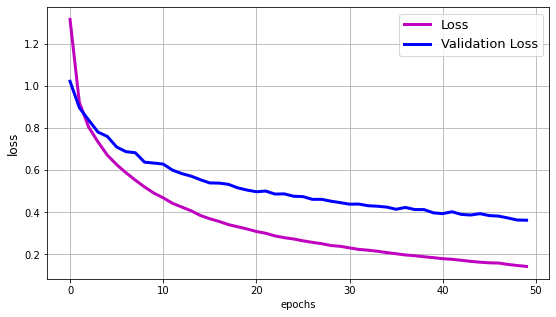

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(cnnhistory.history['loss'], 'm', linewidth=3)
plt.plot(cnnhistory.history['val_loss'], 'b', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

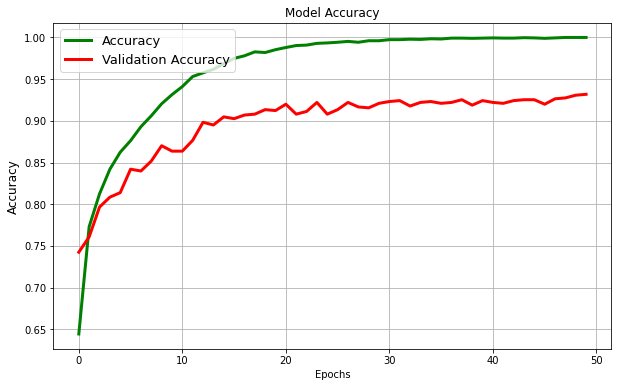

In [ ]:
plt.figure(figsize=(10,6), frameon=True)
plt.plot(cnnhistory.history['accuracy'], 'g', linewidth=3)
plt.plot(cnnhistory.history['val_accuracy'], 'r', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)
plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

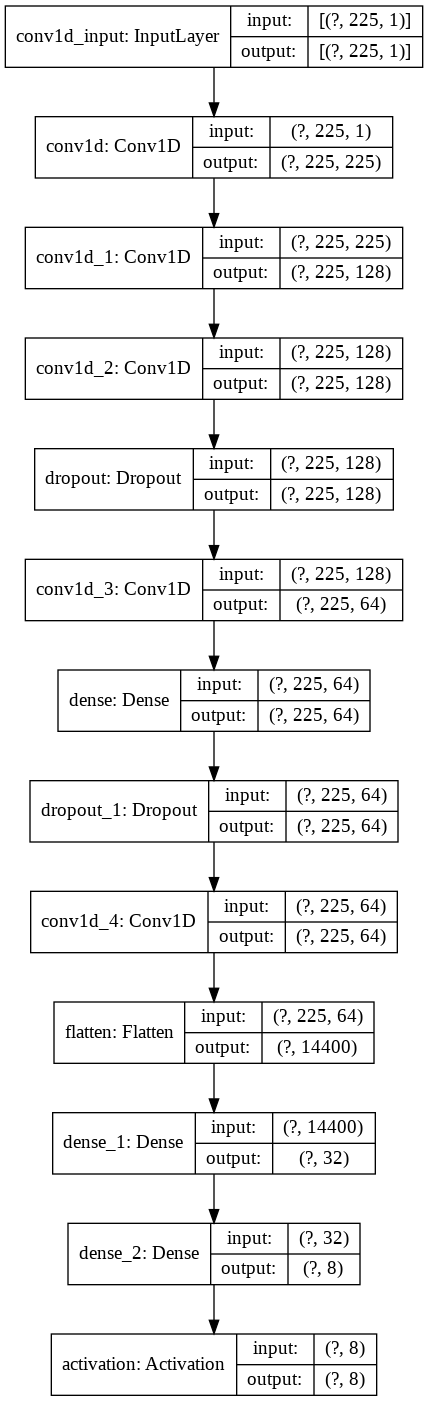

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = (model_path + 'img_cnn_model_' + model_name + '.png')
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)


# **SAVING THE MODEL**

In [ ]:
model.save(os.path.join(model_path, (model_name + '.h5')))
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/My_AI/MY MODELS/Emotion_Voice_Detection_CNN_model_18_FEMALE_8features_normalized_tanh_regularized.h5 


In [ ]:
model_json = model.to_json()
with open((model_path + model_name + '.json'), "w") as json_file:
    json_file.write(model_json)

# **LOADING THE MODEL**

In [ ]:
json_file = open(model_path + model_name + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(model_path + model_name + '.h5')
print("Loaded model from disk")

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# **Predicting emotions on the test data**


In [ ]:
lb = LabelEncoder()
#lb.classes_ = 

predicted = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
predicted = predicted.argmax(axis=1)
predicted = predicted.astype(int).flatten()

predictions = (lb.inverse_transform((predicted)))

actual = pd.DataFrame({'predictedvalues': predictions})
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()

actual_labels = (lb.inverse_transform((actual)))

actual_labels = pd.DataFrame({'actualvalues': actual_labels})
prediction_df = actual_labels.join(predictions)

prediction_df[100:110]

29/29 [==============================] - 2s 53ms/step


,actualvalues,predictedvalues
10,female_joy,female_joy
11,female_fear,female_fear
12,female_anger,female_anger
13,female_anger,female_anger
14,female_anger,female_anger
15,female_anger,female_anger
16,female_disgust,female_disgust
17,female_surprise,female_surprise
18,female_neutral,female_neutral
19,female_neutral,female_neutral


In [ ]:
prediction_df.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_anger,126
female_calm,13
female_disgust,120
female_fear,146
female_joy,141
female_neutral,112
female_sadness,140
female_surprise,126


In [ ]:
prediction_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_anger,130
female_calm,13
female_disgust,119
female_fear,135
female_joy,131
female_neutral,114
female_sadness,155
female_surprise,127


In [ ]:
prediction_df.to_csv(model_path + model_name + '.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classes = prediction_df.actualvalues.unique()
classes.sort()    
print(classification_report(prediction_df.actualvalues, prediction_df.predictedvalues, target_names=classes))


                 precision    recall  f1-score   support

   female_anger       0.93      0.96      0.95       126
    female_calm       0.69      0.69      0.69        13
 female_disgust       0.97      0.96      0.96       120
    female_fear       0.94      0.87      0.90       146
     female_joy       0.95      0.89      0.92       141
 female_neutral       0.95      0.96      0.96       112
 female_sadness       0.87      0.96      0.92       140
female_surprise       0.95      0.96      0.96       126

       accuracy                           0.93       924
      macro avg       0.91      0.91      0.91       924
   weighted avg       0.93      0.93      0.93       924



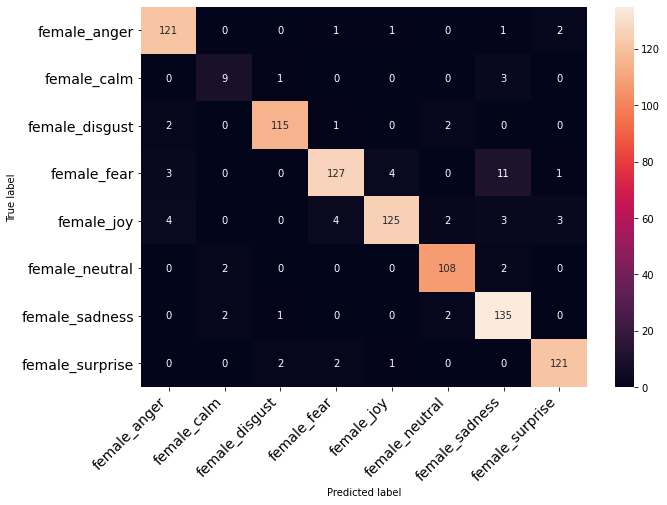

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_joy' or 'female_sadness' or 'female_surprise' or 'female_neutral' or 'female_anger' or 'female_calm':
        return 'female'

prediction_df = pd.read_csv(model_path + model_name + '.csv')
classes = prediction_df.actualvalues.unique()
classes.sort()    

c = confusion_matrix(prediction_df.actualvalues, prediction_df.predictedvalues)
#print(accuracy_score(prediction_df.actualvalues, prediction_df.predictedvalues))
print_confusion_matrix(c, class_names = classes)